In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.patches as mpatches
from statistics import mean


In [ ]:
df = '/content/Assignment_dataset.xlsx'

In [ ]:
df = pd.read_excel("Assignment_dataset.xlsx")

In [ ]:
print(df['Date'])

0     2019-07-01
1     2019-07-02
2     2019-07-03
3     2019-07-04
4     2019-07-05
         ...    
977   2022-03-20
978   2022-03-21
979   2022-03-22
980   2022-03-23
981   2022-03-24
Name: Date, Length: 982, dtype: datetime64[ns]


In [ ]:
df.dtypes

Date    datetime64[ns]
GHI            float64
PR             float64
dtype: object

In [ ]:
x=list(df['Date'])
y=list(df['PR'])
#colors = {1:'blue', 2:'green', 3:'orange', 4:'brown'}

In [ ]:
df['30dmva'] = df['PR'].rolling(30).mean()
conditions = [
    (df['GHI'] <= 2),
    (df['GHI'] > 2) & (df['GHI'] <= 4),
    (df['GHI'] > 4) & (df['GHI'] <= 6),
    (df['GHI'] > 6)
    ]
values = ['blue', 'magenta', 'orange', 'brown']


df['ColorCoding'] = np.select(conditions, values)


df['just_date'] = df['Date'].dt.date


v1 = np.linspace(73.9, 72.7,3)
format_data = "%d/%m/%y %H:%M:%S.%f"


conditions1 = [
    (dt.datetime(2019, 6, 30) <= df['Date']) & (df['Date'] <= dt.datetime(2020, 7, 1) ),
    (dt.datetime(2020, 7, 1) <= df['Date']) & (df['Date'] <= dt.datetime(2021, 7, 1)),
    (dt.datetime(2021, 7, 1) <= df['Date']) & (df['Date'] <= dt.datetime(2022, 7, 1)),
    ]
#values1 = ['73.9', '73.3', '72.7']

df['BudgetLine'] = np.select(conditions1, v1)
df.head(n=370,)
count=0;
if(df['PR']>df['BudgetLine']):
  count=count+1

print(count)
  


ValueError: ignored

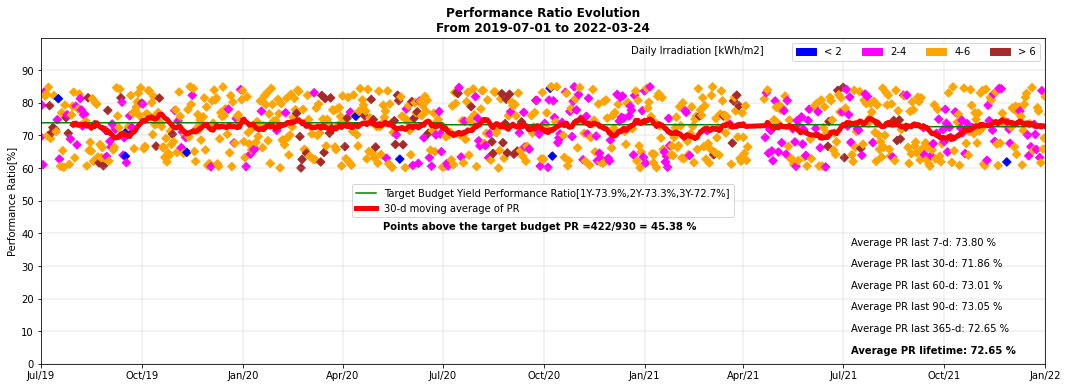

In [ ]:


fig, ax = plt.subplots(figsize=(18, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))
ax.set_xlim([dt.date(2019, 7, 1), dt.date(2022, 1,1)])
ax.set_ylim(bottom=0,top=100)
plt.ylabel("Performance Ratio[%]")
plt.title("Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24",weight="bold")
plt.grid(linewidth=0.3)
blue_patch = mpatches.Patch(color='blue', label='< 2')
magenta_patch = mpatches.Patch(color='magenta', label='2-4')
orange_patch = mpatches.Patch(color='orange', label='4-6')
brown_patch = mpatches.Patch(color='brown', label='> 6')

first_legend=plt.legend(handles=[blue_patch,magenta_patch,orange_patch,brown_patch],  loc=1, ncol=4 )

scatter=ax.scatter(x, y,c=df['ColorCoding'],marker="D")

z=df['30dmva']
plt.yticks(np.arange(0, 100, step=10))
budgetline=df['BudgetLine']

ax.plot(x,budgetline,color='green',label='Target Budget Yield Performance Ratio[1Y-73.9%,2Y-73.3%,3Y-72.7%]')
#ax.invert_yaxis()

ax.plot(x,z,color='red', linewidth=5,label='30-d moving average of PR')

fig.text(0.58, 0.843, 
         'Daily Irradiation [kWh/m2]', 
         style = 'normal',
         fontsize = 10,
         color = "black",
         )
fig.text(0.389, 0.435, 
         'Points above the target budget PR =422/930 = 45.38 %', 
         style = 'normal',
         fontsize = 10,
         color = "black",
         weight="bold")

fig.text(0.75, 0.15, 
         'Average PR lifetime: 72.65 %', 
         style = 'normal',
         fontsize = 10,
         color = "black",
         weight="bold")

fig.text(0.75, 0.2, 
         'Average PR last 365-d: 72.65 %', 
         style = 'normal',
         fontsize = 10,
         color = "black")

fig.text(0.75, 0.25, 
         'Average PR last 90-d: 73.05 %', 
         style = 'normal',
         fontsize = 10,
         color = "black")

fig.text(0.75, 0.3, 
         'Average PR last 60-d: 73.01 %', 
         style = 'normal',
         fontsize = 10,
         color = "black")

fig.text(0.75, 0.35, 
         'Average PR last 30-d: 71.86 %', 
         style = 'normal',
         fontsize = 10,
         color = "black")

fig.text(0.75, 0.4, 
         'Average PR last 7-d: 73.80 %', 
         style = 'normal',
         fontsize = 10,
         color = "black")


  


#p=np.array([[ 73.9],[ 73.3],[ 72.7]])
# d= np.array[datetime.date(2020, 6, 1,), datetime.date(2021, 6, 1),datetime.date(2022, 1, 1)]
# ax.plot(b,d,c='green')
# data1='"2020-06-1"'
# data2='"2021-06-1"'
# data3='"2021-01-1"'
# data1_1 = datetime.strptime(data1, '"%Y-%m-%d"').date()
# data2_1 = datetime.strptime(data2, '"%Y-%m-%d"').date()
# data3_1 = datetime.strptime(data3, '"%Y-%m-%d"').date()

# lst=[data1_1,data2_1,data3_1]
# ax.plot(p,lst)
ax.legend(loc="center")
plt.gca().add_artist(first_legend)
#ax.figtext()



In [ ]:
df['pandas_SMA_7'] = df['PR'].rolling(window=7).mean()
#print(df['pandas_SMA_3'])
df.iloc[-1]

Date            2022-03-24 00:00:00
GHI                         5.12505
PR                        79.911798
30dmva                    71.855995
ColorCoding                  orange
just_date                2022-03-24
BudgetLine                     72.7
pandas_SMA_3              73.803662
pandas_SMA_7              73.803662
Name: 981, dtype: object

In [ ]:
df['30-d avg'] = df['PR'].rolling(window=30).mean()

df['60-d avg'] = df['PR'].rolling(window=60).mean()
df['90-d avg'] = df['PR'].rolling(window=90).mean()
df['365-d avg'] = df['PR'].rolling(window=365).mean()
df.iloc[-1]


Date              2022-03-24 00:00:00
GHI                           5.12505
PR                          79.911798
30dmva                      71.855995
ColorCoding                    orange
just_date                  2022-03-24
BudgetLine                       72.7
pandas_SMA_3                73.803662
pandas_SMA_7                73.803662
pandas_SMA_30               71.855995
pandas_SMA_360              73.009264
pandas_SMA_60               73.009264
pandas_SMA_90               73.050615
30-d avg                    71.855995
60-d avg                    73.009264
90-d avg                    73.050615
365-d avg                   72.653865
Name: 981, dtype: object

In [ ]:
def Average(lst):
    return mean(lst)
  
lst = [15, 9, 55, 41, 35, 20, 62, 49]
lftaverage = Average(df['PR'])
print((lftaverage))



72.64860790714278


In [ ]:
#df1 = df.groupby(pd.cut(df['GHI'], np.arange(0,6.2,2))).sum()
# df1 = df.sort_values('GHI')
# bins = np.arange(0,7,1)
# i=np.digitize(df1['GHI'],bins)
# df1.groupby(i).head()